# Question 1: Convolutional Neural Network for MNIST Classification
You are required to create a Convolutional Neural Network (CNN) using Keras to classify the MNIST dataset. Follow the
steps below to complete the task.

MNIST Dataset Overview:
The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9). Each image is 28x28 pixels. The
dataset is divided as follows:
- Training Set: 60,000 images
- Testing Set: 10,000 images
Each image is labeled with the corresponding digit.

In [47]:
#importing important Libraries 

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,MaxPooling2D

from keras import utils

import keras
from keras.datasets import mnist

In [48]:
# Trainng and test data

(x_train,y_train), (x_test, y_test)  = mnist.load_data()

In [49]:
x_train.shape

(60000, 28, 28)

In [50]:
y_train.shape

(60000,)

In [51]:
x_test.shape

(10000, 28, 28)

In [52]:
y_test.shape

(10000,)

# Tasks:

# 1. Preprocessing Steps:
- Load the MNIST dataset using Keras.
- Normalize the pixel values of the images to the range [0, 1].
- Reshape the images to include a channel dimension (28, 28, 1) suitable for a CNN.
- Convert the labels to one-hot encoding using the to_categorical function.

In [53]:
#Reshaping the data

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [54]:
x_train.shape

(60000, 28, 28, 1)

In [55]:
x_test.shape

(10000, 28, 28, 1)

In [56]:
# Normalize the pixel values of the images to the range [0, 1].


x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


In [57]:
# Convert labels to one-hot encoding


from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [58]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [59]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 2. Model Architecture:
- Create a Convolutional Neural Network with the following layers:
1. A convolutional layer with at least 32 filters, a kernel size of 3x3, and ReLU activation.
2. A max pooling layer with a pool size of 2x2.
3. A second convolutional layer with at least 64 filters, a kernel size of 3x3, and ReLU activation.
4. A max pooling layer with a pool size of 2x2.
5. A third convolutional layer with at least 128 filters, a kernel size of 3x3, and ReLU activation.
6. A fourth convolutional layer with at least 256 filters, a kernel size of 3x3, and ReLU activation.
7. Flatten the output from the final pooling layer.
8. A fully connected layer with 128 units and ReLU activation.
9. A second fully connected layer with 50 units and ReLU activation.
10. A third fully connected layer with 50 units and ReLU activation.
11. An output layer with 10 units and softmax activation for classification.

In [65]:
#CNN Sequential medal
model = Sequential()

# adding A convolutional layer with at least 32 filters, a kernel size of 3x3, and ReLU activation.
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',input_shape=(28,28,1)))

# adding A max pooling layer with a pool size of 2x2.
model.add(MaxPooling2D((2,2)))

#A second convolutional layer with at least 64 filters, a kernel size of 3x3, and ReLU activation.
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer = 'he_uniform'))

#A max pooling layer with a pool size of 2x2.
model.add(MaxPooling2D((2,2)))

# A third convolutional layer with at least 128 filters, a kernel size of 3x3, and ReLU activation.
model.add(Conv2D(128,(3,3),activation = 'relu'))

# A fourth convolutional layer with at least 256 filters, a kernel size of 3x3, and ReLU activation.
model.add(Conv2D(256,(3,3),activation = 'relu'))

#Flatten the output from the final pooling layer.
model.add(Flatten())

#A fully connected layer with 128 units and ReLU activation.
model.add(Dense(128, activation = 'relu'))

#A second fully connected layer with 50 units and ReLU activation.
model.add(Dense(50, activation = 'relu'))

#A third fully connected layer with 50 units and ReLU activation.
model.add(Dense(50, activation = 'relu'))

# An output layer with 10 units and softmax activation for classification.
model.add(Dense(10, activation='softmax'))


# 3. Training and Evaluation:
- Train the model using the Adam optimizer and categorical cross-entropy loss.
- Evaluate the model on the test set and report the accuracy.

In [66]:
# summarizing the Model
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,246 (1.64 MB)

 Trainable params: 430,246 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Train the model using the Adam optimizer and categorical cross-entropy loss.

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
#Evaluate the model on the test set and report the accuracy.

history = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9890 - loss: 0.0401 - val_accuracy: 0.9909 - val_loss: 0.0327
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9924 - loss: 0.0272 - val_accuracy: 0.9868 - val_loss: 0.0492


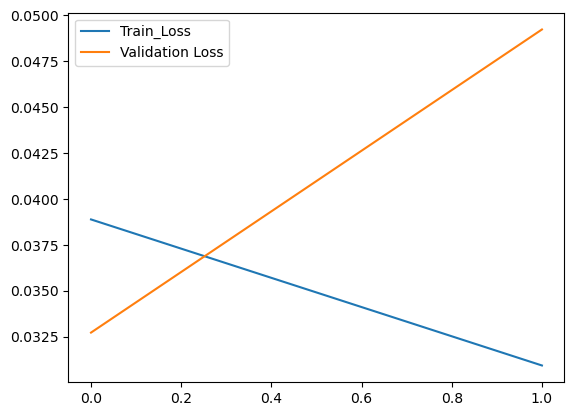

In [73]:
plt.plot(model.history.history['loss'],label='Train_Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()